<a href="https://colab.research.google.com/github/oyjuffer/DL-Final/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-03-21 11:43:52.613901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

# dataset directory.
data_dir= "/content/drive/MyDrive/FER-2013/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir= "emotion-detection-fer/"

In [12]:
image_size = 48
batch_size = 60

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "train/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "test/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [5]:
class_names = val_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


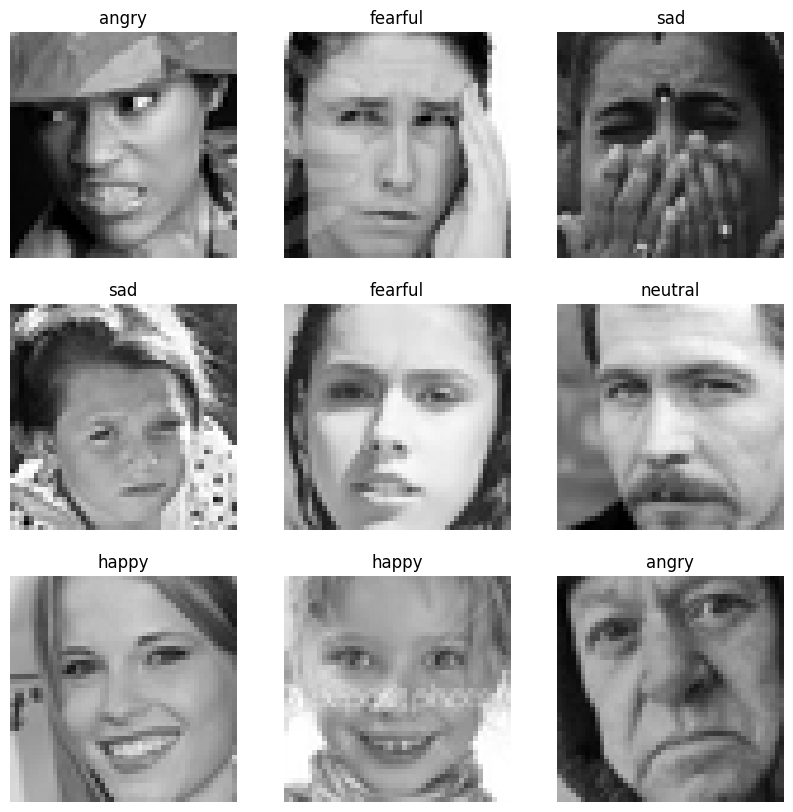

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_size, image_size, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
479/479 [==============================] - 23s 46ms/step - loss: 1.6367 - accuracy: 0.3501 - val_loss: 1.5086 - val_accuracy: 0.4193
Epoch 2/3
479/479 [==============================] - 26s 53ms/step - loss: 1.4026 - accuracy: 0.4616 - val_loss: 1.3464 - val_accuracy: 0.4823
Epoch 3/3
479/479 [==============================] - 28s 58ms/step - loss: 1.2757 - accuracy: 0.5173 - val_loss: 1.2871 - val_accuracy: 0.5001
